In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('crypto_doge.csv')
df.head()

,Date,Open,High,Low,Close
0,01/01/2021,0.0047,0.0058,0.0046,0.0057
1,12/31/2020,0.0047,0.0047,0.0045,0.0047
2,12/30/2020,0.0045,0.0047,0.0044,0.0046
3,12/29/2020,0.0046,0.0046,0.0042,0.0045
4,12/28/2020,0.0045,0.0047,0.0045,0.0046


In [6]:
df.drop(['Date'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close
0,0.0047,0.0058,0.0046,0.0057
1,0.0047,0.0047,0.0045,0.0047
2,0.0045,0.0047,0.0044,0.0046
3,0.0046,0.0046,0.0042,0.0045
4,0.0045,0.0047,0.0045,0.0046


In [7]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['Open', 'High', 'Low', 'Close']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(367, 4)

In [8]:
df_scale[:5]

array([[3.19668146, 4.29169606, 3.40420944, 4.68485699],
       [3.19668146, 2.69560421, 3.23116999, 3.10006345],
       [2.87142998, 2.69560421, 3.05813053, 2.94158409],
       [3.03405572, 2.55050495, 2.71205162, 2.78310474],
       [2.87142998, 2.69560421, 3.23116999, 2.94158409]])

In [9]:
data = pd.DataFrame(df_scale)
data.columns = ['Open', 'High', 'Low', 'Close']

data_cluster = data.copy()
data.head()

,Open,High,Low,Close
0,3.196681,4.291696,3.404209,4.684857
1,3.196681,2.695604,3.231170,3.100063
2,2.871430,2.695604,3.058131,2.941584
3,3.034056,2.550505,2.712052,2.783105
4,2.871430,2.695604,3.231170,2.941584


In [10]:
data.describe()

,Open,High,Low,Close
count,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02
mean,1.312907e-15,-3.509152e-17,4.065776e-16,1.024914e-15
std,1.001365e+00,1.001365e+00,1.001365e+00,1.001365e+00
min,-2.007342e+00,-1.802473e+00,-2.825211e+00,-1.971276e+00
25%,-5.437106e-01,-4.965795e-01,-5.756980e-01,-5.449617e-01
50%,-2.184591e-01,-2.063810e-01,-5.657966e-02,-2.280030e-01
75%,6.759825e-01,6.642146e-01,6.355782e-01,7.228731e-01
max,3.359307e+00,4.581895e+00,3.404209e+00,4.684857e+00


### ***K-Means***

Text(0, 0.5, 'Inertia')

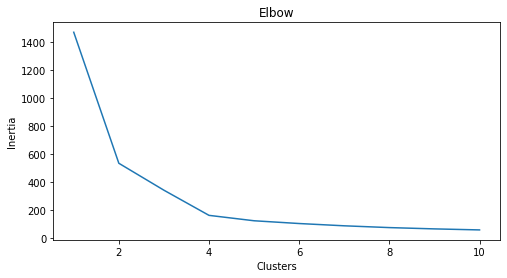

In [11]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [12]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4
0,3.196681,4.291696,3.404209,4.684857,0,3
1,3.196681,2.695604,3.231170,3.100063,0,3
2,2.871430,2.695604,3.058131,2.941584,0,3
3,3.034056,2.550505,2.712052,2.783105,0,3
4,2.871430,2.695604,3.231170,2.941584,0,3
...,...,...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400,2,0
363,-1.194214,-1.076977,-1.094816,-1.020400,2,0
364,-1.194214,-0.641679,-1.094816,-0.544962,2,0
365,-1.194214,-1.076977,-1.094816,-1.178879,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


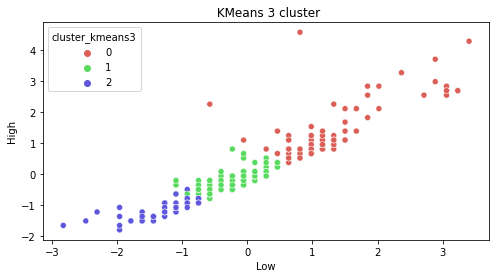

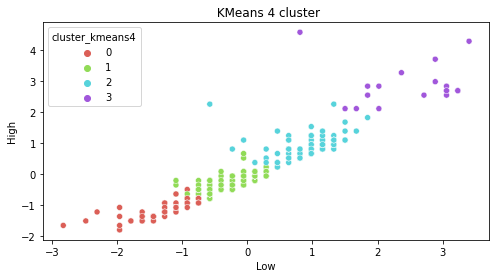

In [13]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Low'], data_cluster['High'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Low'], data_cluster['High'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

### ***K-Medoids***

In [14]:
data

,Open,High,Low,Close
0,3.196681,4.291696,3.404209,4.684857
1,3.196681,2.695604,3.231170,3.100063
2,2.871430,2.695604,3.058131,2.941584
3,3.034056,2.550505,2.712052,2.783105
4,2.871430,2.695604,3.231170,2.941584
...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400
363,-1.194214,-1.076977,-1.094816,-1.020400
364,-1.194214,-0.641679,-1.094816,-0.544962
365,-1.194214,-1.076977,-1.094816,-1.178879


In [15]:
from sklearn_extra.cluster import KMedoids

In [16]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)


,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids
0,3.196681,4.291696,3.404209,4.684857,0,3,0
1,3.196681,2.695604,3.231170,3.100063,0,3,0
2,2.871430,2.695604,3.058131,2.941584,0,3,0
3,3.034056,2.550505,2.712052,2.783105,0,3,0
4,2.871430,2.695604,3.231170,2.941584,0,3,0
...,...,...,...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400,2,0,1
363,-1.194214,-1.076977,-1.094816,-1.020400,2,0,1
364,-1.194214,-0.641679,-1.094816,-0.544962,2,0,1
365,-1.194214,-1.076977,-1.094816,-1.178879,2,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


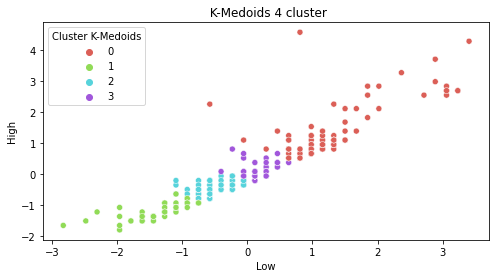

In [17]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Low'], data_cluster['High'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

### ***Hierarchy***

In [19]:
data

,Open,High,Low,Close
0,3.196681,4.291696,3.404209,4.684857
1,3.196681,2.695604,3.231170,3.100063
2,2.871430,2.695604,3.058131,2.941584
3,3.034056,2.550505,2.712052,2.783105
4,2.871430,2.695604,3.231170,2.941584
...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400
363,-1.194214,-1.076977,-1.094816,-1.020400
364,-1.194214,-0.641679,-1.094816,-0.544962
365,-1.194214,-1.076977,-1.094816,-1.178879


In [20]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

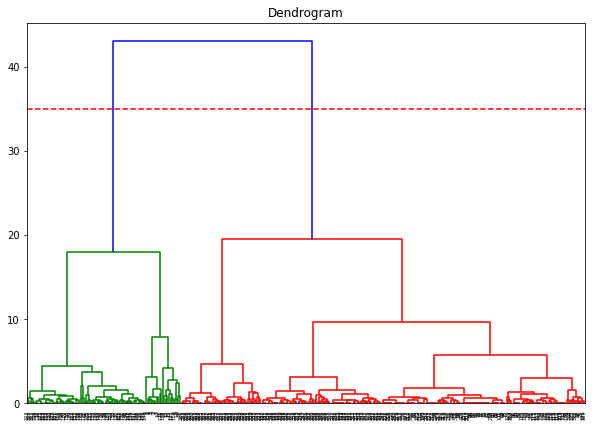

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

In [57]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [58]:
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,3.196681,4.291696,3.404209,4.684857,1,1,0
1,3.196681,2.695604,3.231170,3.100063,1,1,0
2,2.871430,2.695604,3.058131,2.941584,1,1,0
3,3.034056,2.550505,2.712052,2.783105,1,1,0
4,2.871430,2.695604,3.231170,2.941584,1,1,0
...,...,...,...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400,2,3,2
363,-1.194214,-1.076977,-1.094816,-1.020400,2,3,2
364,-1.194214,-0.641679,-1.094816,-0.544962,2,3,2
365,-1.194214,-1.076977,-1.094816,-1.178879,2,3,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Hierarchical Clustering')

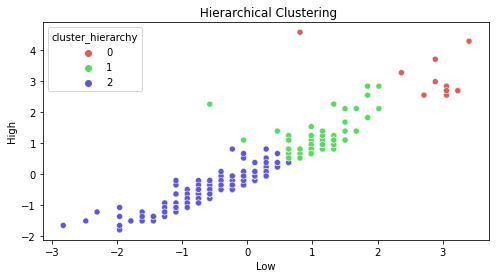

In [59]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Low'], data_cluster['High'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

### ***DBSCAN***

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
data

,Open,High,Low,Close
0,3.196681,4.291696,3.404209,4.684857
1,3.196681,2.695604,3.231170,3.100063
2,2.871430,2.695604,3.058131,2.941584
3,3.034056,2.550505,2.712052,2.783105
4,2.871430,2.695604,3.231170,2.941584
...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400
363,-1.194214,-1.076977,-1.094816,-1.020400
364,-1.194214,-0.641679,-1.094816,-0.544962
365,-1.194214,-1.076977,-1.094816,-1.178879


In [62]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [63]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,3.196681,4.291696,3.404209,4.684857,1,1,0,-1
1,3.196681,2.695604,3.231170,3.100063,1,1,0,0
2,2.871430,2.695604,3.058131,2.941584,1,1,0,0
3,3.034056,2.550505,2.712052,2.783105,1,1,0,0
4,2.871430,2.695604,3.231170,2.941584,1,1,0,0
...,...,...,...,...,...,...,...,...
362,-1.031588,-1.076977,-0.921777,-1.020400,2,3,2,1
363,-1.194214,-1.076977,-1.094816,-1.020400,2,3,2,1
364,-1.194214,-0.641679,-1.094816,-0.544962,2,3,2,1
365,-1.194214,-1.076977,-1.094816,-1.178879,2,3,2,1


In [64]:
data_cluster.describe()

,Open,High,Low,Close,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,367.000000,367.000000,367.000000,367.000000
mean,1.312907e-15,-3.509152e-17,4.065776e-16,1.024914e-15,0.637602,1.089918,1.697548,0.904632
std,1.001365e+00,1.001365e+00,1.001365e+00,1.001365e+00,0.769645,1.219192,0.526427,0.396922
min,-2.007342e+00,-1.802473e+00,-2.825211e+00,-1.971276e+00,0.000000,0.000000,0.000000,-1.000000
25%,-5.437106e-01,-4.965795e-01,-5.756980e-01,-5.449617e-01,0.000000,0.000000,1.000000,1.000000
50%,-2.184591e-01,-2.063810e-01,-5.657966e-02,-2.280030e-01,0.000000,0.000000,2.000000,1.000000
75%,6.759825e-01,6.642146e-01,6.355782e-01,7.228731e-01,1.000000,2.000000,2.000000,1.000000
max,3.359307e+00,4.581895e+00,3.404209e+00,4.684857e+00,2.000000,3.000000,2.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' DBSCAN clustering')

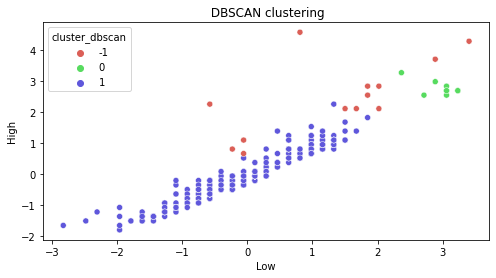

In [65]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Low'], data_cluster['High'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN clustering')